# Predicting Income level using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting income level based on the individual's personal information. 

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation 

## 1. Problem Defintion

In a statement,
> Given an individual's personal information, can we predict their income level?

## 2. Data

The original data came from the 1994 Census database. The dataset can be found at the UCI Machine Learning Respitory.
https://archive.ics.uci.edu/ml/datasets/Adult

There is also a version of it available on Kaggle
https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

## 3. Evaluation 

> If we can reach 95% accuracy at predicting income level, we'll pursue the project.

## 4. Features 

This is where we'll get different information about each of the features in the data.

**create data dictionary**

1. age: age in years (int)
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: final weight (the number of people the census believes the entry represents)
4. education: Highest level of education.
    * Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: Highest level of education in numerical form.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
    * 0 = male
    * 1 = female
11. capital-gain: capital gains for an individual.
12. capital-loss: capital loss for an indivdual.
13. hours-per-week: Hours an indivudal works per week.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 
15. Income class:
    * 0 = <=50K
    * 1 = >50K


## Preparing the tools 

we're going to use padas, Matplotlib, and Numpy for data analysis and manipulation

In [323]:
# Import all the tools we need

# Import EDA (exploratory data analysis) and plotting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# We want our plots to appear inside the notebook
%matplotlib inline

# To ignore warnings 
import warnings
warnings.filterwarnings('ignore')

# Getting data ready
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Import models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [131]:
df = pd.read_csv("data/adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Exploration (exploratory data analysis or EDA)

We're going to find out more about the data. These are some questions we can ask to understand the data...

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change, or remove features to get more out of the data?

In [132]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [133]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [134]:
# Let's find out how many of each class there are
df["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

## cleaning the data

In [135]:
# Replace '?' with NaN then drop all the rows with missing (NaN) values.
df = df.replace({'?': np.nan}).dropna()
# create a new column called "sex" and drop the gender column. 
# the sex column will have male as 0 and female as 1
df["sex"] = np.where(df["gender"] == "Male", 0, 1)
df.drop(["gender"],axis=1, inplace=True)
# dropping the educational column
df.drop(['education'], axis=1, inplace=True)
# In the income column, label "<=50k" as 0 and ">50K" as 1
df["income"] = df["income"].map(dict(zip(["<=50K",">50K"],[0,1])))
# convert capital gain and capital loss into total capital
df["Total_capital"] = (df["capital-gain"] - df["capital-loss"])
# dropping capital gain and capital loss columns
df.drop(['capital-gain'], axis=1, inplace=True)
df.drop(['capital-loss'], axis=1, inplace=True)

# checking for duplicate values 
df.duplicated().sum()
# dopping all dipilcate values
df = df.drop_duplicates()

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   educational-num  45175 non-null  int64 
 4   marital-status   45175 non-null  object
 5   occupation       45175 non-null  object
 6   relationship     45175 non-null  object
 7   race             45175 non-null  object
 8   hours-per-week   45175 non-null  int64 
 9   native-country   45175 non-null  object
 10  income           45175 non-null  int64 
 11  sex              45175 non-null  int64 
 12  Total_capital    45175 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 4.8+ MB


In [137]:
# check for any missing values
df.isna().sum()

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
hours-per-week     0
native-country     0
income             0
sex                0
Total_capital      0
dtype: int64

In [138]:
# statistical summary of the dataframe 
df.describe()

,age,fnlwgt,educational-num,hours-per-week,income,sex,Total_capital
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,40.942512,0.247969,0.324958,1013.888677
std,13.215349,1.056524e+05,2.551740,12.007730,0.431839,0.468365,7534.160808
min,17.000000,1.349200e+04,1.000000,1.000000,0.000000,0.000000,-4356.000000
25%,28.000000,1.173925e+05,9.000000,40.000000,0.000000,0.000000,0.000000
50%,37.000000,1.783120e+05,10.000000,40.000000,0.000000,0.000000,0.000000
75%,47.000000,2.379030e+05,13.000000,45.000000,0.000000,1.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99.000000,1.000000,1.000000,99999.000000


In [139]:
df.describe(exclude='number')

,workclass,marital-status,occupation,relationship,race,native-country
count,45175,45175,45175,45175,45175,45175
unique,7,7,14,6,5,41
top,Private,Married-civ-spouse,Craft-repair,Husband,White,United-States
freq,33262,21042,6010,18653,38859,41256


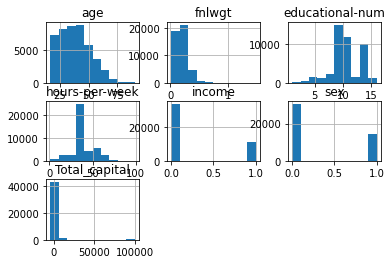

In [140]:
df.hist();

In [141]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,hours-per-week,native-country,income,sex,Total_capital
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,40,United-States,0,0,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,50,United-States,0,0,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,40,United-States,1,0,0
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,40,United-States,1,0,7688
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,30,United-States,0,0,0


In [150]:
# Split the data into categorical and numercal data. Also split the income (traget) column
numerical = df.iloc[:,[0,2,3,8,11,12]]
categorical = df.iloc[:,[1,3,5,6,7,9]]
target = df["income"]

In [151]:
# look at the numerical columns
numerical

,age,fnlwgt,educational-num,hours-per-week,sex,Total_capital
0,25,226802,7,40,0,0
1,38,89814,9,50,0,0
2,28,336951,12,40,0,0
3,44,160323,10,40,0,7688
5,34,198693,6,30,0,0
...,...,...,...,...,...,...
48837,27,257302,12,38,1,0
48838,40,154374,9,40,0,0
48839,58,151910,9,40,1,0
48840,22,201490,9,20,0,0


In [152]:
# look at the catergorical column
categorical

,workclass,educational-num,occupation,relationship,race,native-country
0,Private,7,Machine-op-inspct,Own-child,Black,United-States
1,Private,9,Farming-fishing,Husband,White,United-States
2,Local-gov,12,Protective-serv,Husband,White,United-States
3,Private,10,Machine-op-inspct,Husband,Black,United-States
5,Private,6,Other-service,Not-in-family,White,United-States
...,...,...,...,...,...,...
48837,Private,12,Tech-support,Wife,White,United-States
48838,Private,9,Machine-op-inspct,Husband,White,United-States
48839,Private,9,Adm-clerical,Unmarried,White,United-States
48840,Private,9,Adm-clerical,Own-child,White,United-States


In [153]:
# look at the income (target) column
target

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45175, dtype: int64

In [158]:
#  onehot encoding
one_hot = pd.get_dummies(categorical)
one_hot

,educational-num,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [159]:
# standardize the data
min_max_scaler = preprocessing.MinMaxScaler()
names = numerical.columns
new_numerical = min_max_scaler.fit_transform(numerical)
sd_numerical = pd.DataFrame(new_numerical, columns=names)
sd_numerical.tail(10)

,age,fnlwgt,educational-num,hours-per-week,sex,Total_capital
45165,0.205479,0.013930,0.333333,0.397959,0.0,0.041742
45166,0.356164,0.048188,0.666667,0.448980,0.0,0.041742
45167,0.205479,0.069501,0.866667,0.102041,0.0,0.041742
45168,0.493151,0.208796,0.866667,0.397959,0.0,0.041742
45169,0.068493,0.200866,0.600000,0.397959,0.0,0.041742
45170,0.136986,0.165081,0.733333,0.377551,1.0,0.041742
45171,0.315068,0.095390,0.533333,0.397959,0.0,0.041742
45172,0.561644,0.093721,0.533333,0.397959,1.0,0.041742
45173,0.068493,0.127292,0.533333,0.193878,0.0,0.041742
45174,0.479452,0.185817,0.533333,0.397959,1.0,0.185712


In [160]:
# get both numerical and categorical columns back to one dataframe
col = list(sd_numerical.columns) + list(one_hot.columns)
c = np.hstack((sd_numerical, one_hot))
sd_df = pd.DataFrame(c, columns=col)

In [163]:
df.shape

(45175, 13)

In [162]:
one_hot.shape, sd_numerical.shape

((45175, 74), (45175, 6))

In [164]:
sd_df

,age,fnlwgt,educational-num,hours-per-week,sex,Total_capital,educational-num,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.144430,0.400000,0.397959,0.0,0.041742,7.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.051677,0.533333,0.500000,0.0,0.041742,9.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.219011,0.733333,0.397959,0.0,0.041742,12.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.099418,0.600000,0.397959,0.0,0.115414,10.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.232877,0.125398,0.333333,0.295918,0.0,0.041742,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,0.136986,0.165081,0.733333,0.377551,1.0,0.041742,12.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45171,0.315068,0.095390,0.533333,0.397959,0.0,0.041742,9.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45172,0.561644,0.093721,0.533333,0.397959,1.0,0.041742,9.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45173,0.068493,0.127292,0.533333,0.193878,0.0,0.041742,9.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


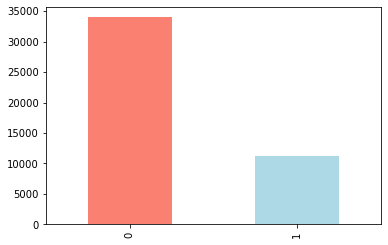

In [165]:
# comparing the income class using graphs for visualization
df["income"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

## Analyzing our data

In [166]:
df['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

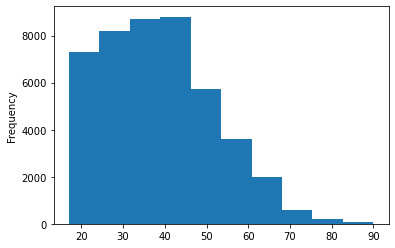

In [167]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

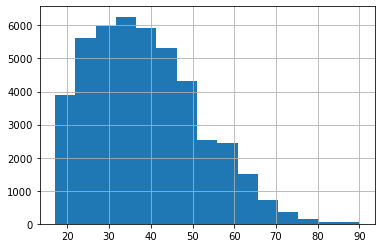

In [173]:
# Grouped the age column so it is easier to look at in a graph
grouped_age = pd.cut(df["age"], bins=15)
grouped_age

df['age'].hist(bins=15);


In [169]:
# Compare income column with age column
pd.crosstab(df.income, grouped_age)

age,"(16.927, 21.867]","(21.867, 26.733]","(26.733, 31.6]","(31.6, 36.467]","(36.467, 41.333]","(41.333, 46.2]","(46.2, 51.067]","(51.067, 55.933]","(55.933, 60.8]","(60.8, 65.667]","(65.667, 70.533]","(70.533, 75.4]","(75.4, 80.267]","(80.267, 85.133]","(85.133, 90.0]"
income,,,,,,,,,,,,,,,
0,3880,5382,5008,4633,3904,3281,2581,1573,1594,1086,542,289,130,50,40
1,9,237,987,1630,2018,2037,1743,974,857,418,166,78,25,10,13


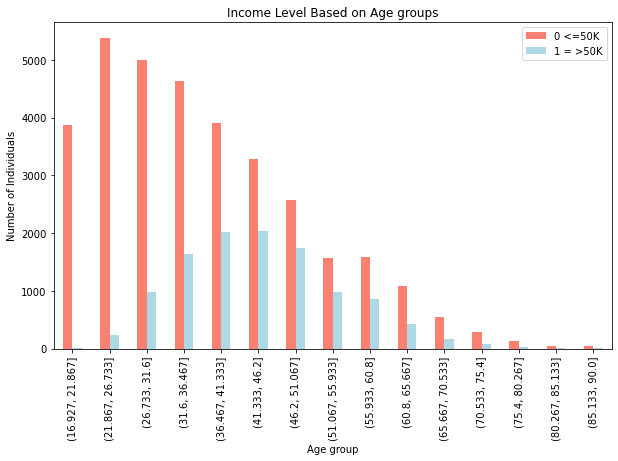

In [177]:
# create a plot of the crosstab between age and income level
pd.crosstab(grouped_age, df.income).plot(kind="bar",
                                          figsize=(10,6),
                                          color=["salmon", "lightblue"]);

plt.title("Income Level Based on Age groups")
plt.xlabel("Age group")
plt.ylabel("Number of Individuals")
plt.legend(["0 <=50K", "1 = >50K"])
#plt.xticks(rotation=0);

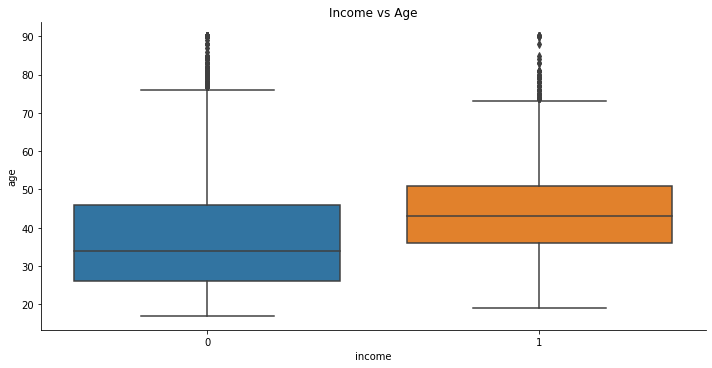

In [171]:
# Relationship between income and age
sns.catplot(data=df, x='income', y='age', kind='box', aspect=2)
plt.title('Income vs Age');

In [178]:
# compare workclass column with income level column
pd.crosstab(df.workclass, df.income)

income,0,1
workclass,,
Federal-gov,857,549
Local-gov,2185,915
Private,26017,7245
Self-emp-inc,733,912
Self-emp-not-inc,2736,1059
State-gov,1426,520
Without-pay,19,2


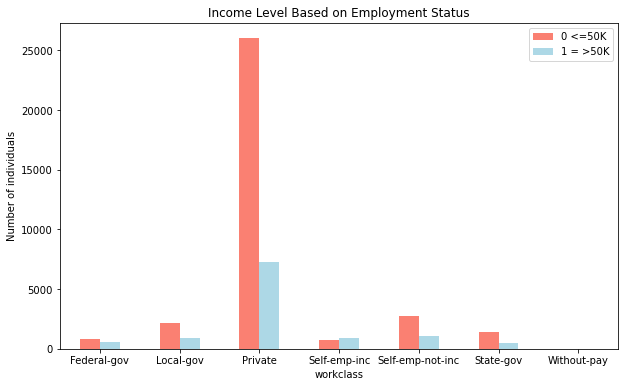

In [179]:
# create a plot of the crosstab between employment status and income
pd.crosstab(df.workclass, df.income).plot(kind="bar",
                                             figsize=(10,6),
                                             color=["salmon", "lightblue"]);

plt.title("Income Level Based on Employment Status")
plt.ylabel("Number of individuals")
plt.legend(["0 <=50K", "1 = >50K"])
plt.xticks(rotation=0);

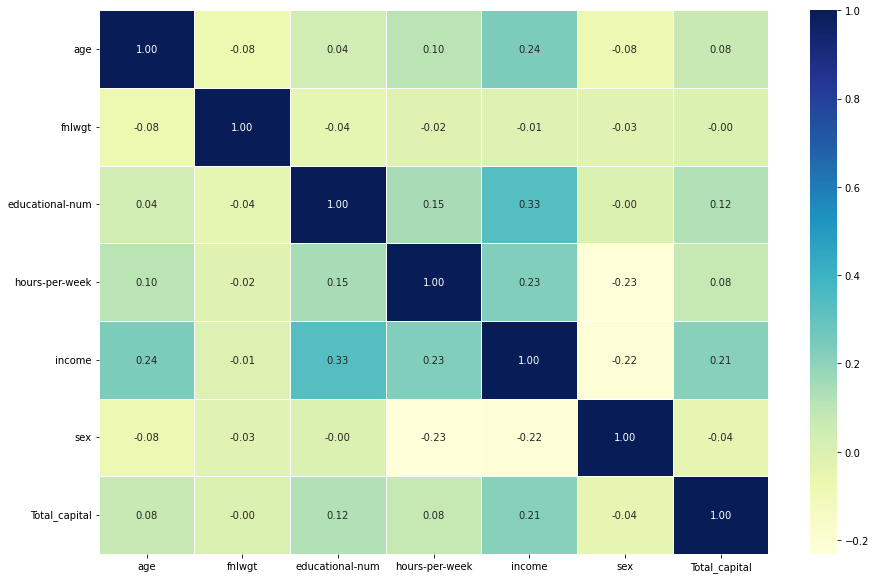

In [183]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

## 5. Modelling

In [184]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,hours-per-week,native-country,income,sex,Total_capital
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,40,United-States,0,0,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,50,United-States,0,0,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,40,United-States,1,0,0
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,40,United-States,1,0,7688
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,30,United-States,0,0,0


In [185]:
df.tail()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,hours-per-week,native-country,income,sex,Total_capital
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,38,United-States,0,1,0
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,40,United-States,1,0,0
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,40,United-States,0,1,0
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,20,United-States,0,0,0
48841,52,Self-emp-inc,287927,9,Married-civ-spouse,Exec-managerial,Wife,White,40,United-States,1,1,15024


In [187]:
# look at the stadardized data
sd_df.head()

,age,fnlwgt,educational-num,hours-per-week,sex,Total_capital,educational-num,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.144430,0.400000,0.397959,0.0,0.041742,7.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.051677,0.533333,0.500000,0.0,0.041742,9.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.219011,0.733333,0.397959,0.0,0.041742,12.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.099418,0.600000,0.397959,0.0,0.115414,10.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.232877,0.125398,0.333333,0.295918,0.0,0.041742,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [263]:
# Split data into X and y

# standardized columns excluding the income(target) column
X = sd_df
# The income column
y = target

# Set random seed
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

# use the same function above for the validation set
# set random seed
np.random.seed(42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                 y_train,
                                                 test_size=0.25) # 0.25 * 0.8 = 0.2

In [264]:
# look at the shapes of the training and testing sets
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((27105, 80), (9035, 80), (9035, 80), (27105,), (9035,), (9035,))

Now we've got out data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 4 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. SVC

In [265]:
# Reefrence model 
dum_model = DummyClassifier(strategy='most_frequent')
dum_fit = dum_model.fit(X_train, y_train)
dum_score = dum_model.score(X_test, y_test)
dum_score

0.7572772551189817

In [266]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=10000),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "SVC": SVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit_learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through modles
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [267]:
model_scores = fit_and_score(models=models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

{'Logistic Regression': 0.8364139457664638,
 'KNN': 0.8169341449916989,
 'Random Forest': 0.8493635860542336,
 'SVC': 0.8268954067515218}

## Model Comparison

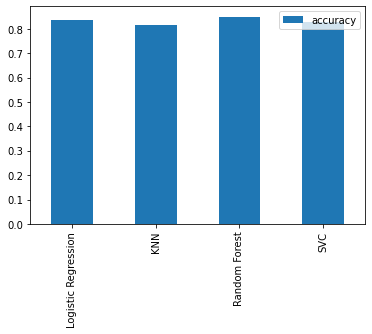

In [268]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should be based our next steps off. What should we do?

we'll do the follwoing:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation 
* Precision
* Recall
* F1-score
* Classification Report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning 

Since the data is really big, i'll only be using `RandomizedSearchCV()`. The score might slightly be less accurate than `GridSearchCV()` but we will save a lot of time 

## Hyperparameter tuning with RandomizedSearchCV

In [252]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"],
               'penalty': ['l1', 'l2']}
# Create a hyperparameter grid for KNN
knn_grid = {"n_neighbors": list(range(1,30)),
           "p": [1,2]}
# Create a hyperparameter grid for RandomForest
ran_For_grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}
# Create a hypereparameter grid for SVC
svc_grid = {'C': [0.1, 1, 10, 100, 1000], 
            'gamma': [0.1, 1, 10, 100],
  'kernel': ['rbf'], 'class_weight':['balanced', None]}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV..

In [270]:
# Tune LogisticRegression

# set random seed
np.random.seed(42)

# Set up random hyperparameter search for LogisitcRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=10,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_val, y_val)

# score radnom hyperparameter search model for LogisticRegression
rs_log_reg.score(X_val, y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8502490315439956

In [272]:
# best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 29.763514416313132}

In [273]:
# Tune KNN

# set random seed
np.random.seed(42)

# set up random hyperparameter search for KNN
rs_knn_reg = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions=knn_grid,
                                cv=5,
                                n_iter=10,
                                verbose=True)

# Fit random hyperparameter search model for KNN
rs_knn_reg.fit(X_val, y_val)

# Score the model
rs_knn_reg.score(X_val, y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8446043165467626

In [274]:
# best hyperparameters
rs_knn_reg.best_params_

{'p': 1, 'n_neighbors': 27}

In [276]:
# Tune RandomForestClassifier

# set random seed
np.random.seed(42)

# set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=ran_For_grid,
                          cv=5,
                          n_iter=10,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_val, y_val)

# score the model
rs_rf.score(X_val, y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.9022689540675152

In [277]:
# best hyperparameters
rs_rf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [278]:
# Tune SVC

# set random seed
np.random.seed(42)

# set up random hyperparameters search for SVC
rs_svc = RandomizedSearchCV(SVC(),
                           param_distributions=svc_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

# Fit random hyperparameter search model for SVC
rs_svc.fit(X_val, y_val)

# score the model
rs_svc.score(X_val, y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8399557277255119

## Evaluating the tuned machine learning classifier models, beyond accuracy 

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... I'll be using cross_validation where possible 



**Area under the receiever operating characterisitc curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positve rate (tpr) versus a models false positve rate (fpr).

* True positve = model predicts 1 when truth is 1
* False positve = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

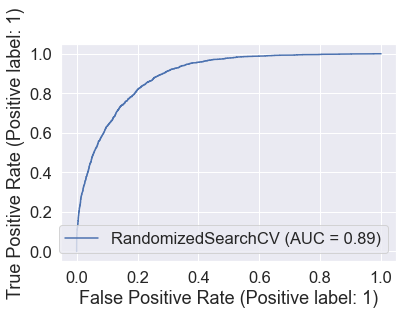

In [321]:
# Make predictions with tuned LogisticRegression model
log_y_preds = rs_log_reg.predict(X_test)
log_y_preds

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_log_reg, X_test, y_test);


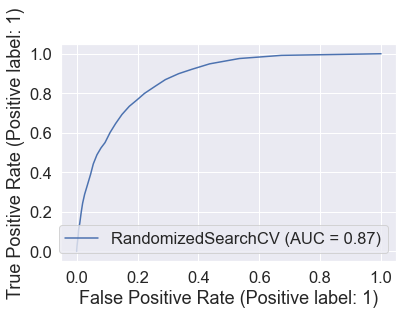

In [322]:
# Make predictions with tuned KNN model
knn_y_preds = rs_knn_reg.predict(X_test)
knn_y_preds

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_knn_reg, X_test, y_test);

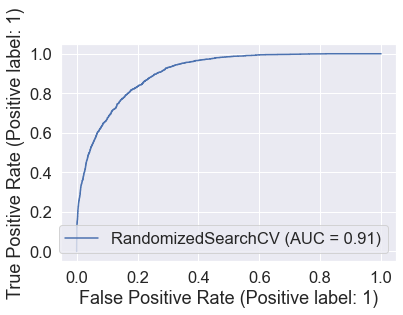

In [324]:
# Make predictions with tuned RandomForest model
rf_y_preds = rs_rf.predict(X_test)
rf_y_preds

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_rf, X_test, y_test);

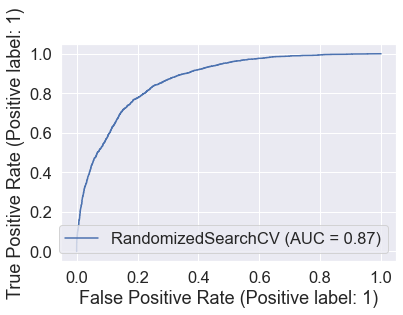

In [325]:
# Make predictions with tuned SVC model
svc_y_preds = rs_svc.predict(X_test)
svc_y_preds

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_svc, X_test, y_test);

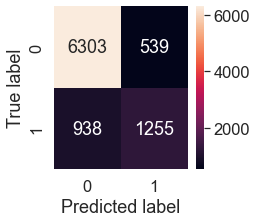

In [367]:
# Confusion matrix for logisitcRegression
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, log_y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, log_y_preds),
                    annot=True,
                     fmt='g',
                    cbar=True)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

#plt.subplot(1, 1, 1)    
plot_conf_mat(y_test, log_y_preds)

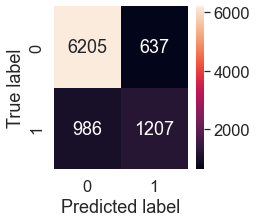

In [317]:
# Confusion matrix for KNN
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, knn_y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, knn_y_preds),
                    annot=True,
                    fmt='g',
                    cbar=True)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, knn_y_preds)

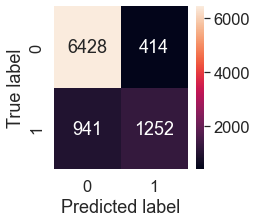

In [319]:
# Confusion matrix for RandomForestClassifier
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, rf_y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, rf_y_preds),
                    annot=True,
                    fmt='g',
                    cbar=True)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, rf_y_preds)

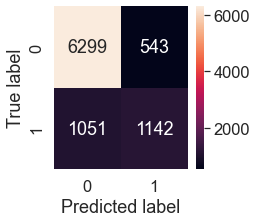

In [320]:
# Confusion matrix for SVC
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, svc_y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, svc_y_preds),
                    annot=True,
                    fmt='g',
                    cbar=True)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, svc_y_preds)

Now i've got a ROC curve, an AUC metric, and a confusion matrix; Let's get a classification report as well as cross-validated precision, recall, and f1-score.


To summarize classfication metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall

In [339]:
# printing the classification report for all 4 models

print("logisticRegression classification report:")
print(classification_report(y_test, log_y_preds))
print("KNN classification report:")
print(classification_report(y_test, knn_y_preds))
print("RandomForest classification report:")
print(classification_report(y_test, rf_y_preds))
print("SVC classification report:")
print(classification_report(y_test, svc_y_preds))

logisticRegression classification report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6842
           1       0.70      0.57      0.63      2193

    accuracy                           0.84      9035
   macro avg       0.79      0.75      0.76      9035
weighted avg       0.83      0.84      0.83      9035

KNN classification report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      6842
           1       0.65      0.55      0.60      2193

    accuracy                           0.82      9035
   macro avg       0.76      0.73      0.74      9035
weighted avg       0.81      0.82      0.81      9035

RandomForest classification report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6842
           1       0.75      0.57      0.65      2193

    accuracy                           0.85      9035
   macro avg       0.81

### Calculate evaluation metric using cross-validation

I'm going to calculate accuracy, precision, recall, and f1-score of our model using cross-validation. To do so, I'll be using `cross_val_score()`.

In [342]:
# check best hyperparameters for the 4 models we're testing
print(f'LogisticRegression best param: {rs_log_reg.best_params_}')
print(f'KNN best param: {rs_knn_reg.best_params_}')
print(f'RandomForestClassifier best param: {rs_rf.best_params_}')
print(f'SVC best param: {rs_svc.best_params_}')

LogisticRegression best param: {'solver': 'liblinear', 'penalty': 'l1', 'C': 29.763514416313132}
KNN best param: {'p': 1, 'n_neighbors': 27}
RandomForestClassifier best param: {'n_estimators': 1200, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}
SVC best param: {'kernel': 'rbf', 'gamma': 0.1, 'class_weight': None, 'C': 1}


In [356]:
# Create a new classifier with best parameters for all 4 models
log_reg_clf = LogisticRegression(C=29.763514416313132,
                                solver='liblinear',
                                penalty= 'l1')

knn_clf = KNeighborsClassifier(p=1,
                              n_neighbors=27)

rf_clf = RandomForestClassifier(n_estimators=1200,
                               min_samples_split=6,
                               min_samples_leaf=2,
                               max_features='sqrt',
                               max_depth=30)
svc_clf = SVC(kernel='rbf',
             gamma=0.1,
             class_weight=None,
             C=1)

In [409]:
# Cross-validated accuracy for LogisticRegression model
log_reg_cv_acc = cross_val_score(log_reg_clf,
                                X,
                                y,
                                cv=5,
                                scoring="accuracy")
print(f'The cross-validated LogisticRegression mean accuracy: {np.mean(log_reg_cv_acc)*100: .2f}%')

# Cross-validated accuracy for KNN model
knn_cv_acc = cross_val_score(knn_clf,
                            X,
                            y,
                            cv=5,
                            scoring="accuracy")
print(f'The cross-validated KNN mean accuracy: {np.mean(knn_cv_acc)*100: .2f}%')

# Cross-validated accuracy for RandomForestClassifier model
rf_cv_acc = cross_val_score(rf_clf,
                            X,
                            y,
                            cv=5,
                            scoring="accuracy")
print(f'The cross-validated RandomForestClassifier mean accuracy: {np.mean(rf_cv_acc)*100: .2f}%')

# Cross-validated accuracy for SVC model
svc_cv_acc = cross_val_score(svc_clf,
                            X,
                            y,
                            cv=5,
                            scoring="accuracy")
print(f'The cross-validated SVC mean accuracy: {np.mean(svc_cv_acc)*100: .2f}%')

The cross-validated LogisticRegression mean accuracy:  84.21%
The cross-validated KNN mean accuracy:  83.15%
The cross-validated RandomForestClassifier mean accuracy:  85.95%
The cross-validated SVC mean accuracy:  83.14%


In [410]:
# Cross-validated precision for LogisticRegression model
log_reg_cv_precision = cross_val_score(log_reg_clf,
                                X,
                                y,
                                cv=5,
                                scoring="precision")
print(f'The cross-validated LogisticRegression mean precision: {np.mean(log_reg_cv_precision)}')

# Cross-validated precision for KNN model
knn_cv_precision = cross_val_score(knn_clf,
                            X,
                            y,
                            cv=5,
                            scoring="precision")
print(f'The cross-validated KNN mean precision: {np.mean(knn_cv_precision)}')

# Cross-validated precision for RandomForestClassifier model
rf_cv_precision = cross_val_score(rf_clf,
                            X,
                            y,
                            cv=5,
                            scoring="precision")
print(f'The cross-validated RandomForestClassifier mean precision: {np.mean(rf_cv_precision)}')

# Cross-validated precision for SVC model
svc_cv_precision = cross_val_score(svc_clf,
                            X,
                            y,
                            cv=5,
                            scoring="precision")
print(f'The cross-validated SVC mean precision: {np.mean(svc_cv_precision)}')

The cross-validated LogisticRegression mean precision: 0.7206984750722337
The cross-validated KNN mean precision: 0.6923120851106079
The cross-validated RandomForestClassifier mean precision: 0.7791086329877881
The cross-validated SVC mean precision: 0.7111604607492972


In [411]:
# Cross-validated recall for LogisticRegression model
log_reg_cv_recall = cross_val_score(log_reg_clf,
                                X,
                                y,
                                cv=5,
                                scoring="recall")
print(f'The cross-validated LogisticRegression mean recall: {np.mean(log_reg_cv_recall)}')

# Cross-validated recall for KNN model
knn_cv_recall = cross_val_score(knn_clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
print(f'The cross-validated KNN mean recall: {np.mean(knn_cv_recall)}')

# Cross-validated recall for RandomForestClassifier model
rf_cv_recall = cross_val_score(rf_clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
print(f'The cross-validated RandomForestClassifier mean recall: {np.mean(rf_cv_recall)}')

# Cross-validated recall for SVC model
svc_cv_recall = cross_val_score(svc_clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
print(f'The cross-validated SVC mean recall: {np.mean(svc_cv_recall)}')

The cross-validated LogisticRegression mean recall: 0.5931966357493466
The cross-validated KNN mean recall: 0.5765931981895838
The cross-validated RandomForestClassifier mean recall: 0.6058724580863135
The cross-validated SVC mean recall: 0.5392782240071397


In [412]:
# Cross-validated f1-score for LogisticRegression model
log_reg_cv_f1 = cross_val_score(log_reg_clf,
                                X,
                                y,
                                cv=5,
                                scoring="f1")
print(f'The cross-validated LogisticRegression mean f1-score: {np.mean(log_reg_cv_f1)}')

# Cross-validated f1-score for KNN model
knn_cv_f1 = cross_val_score(knn_clf,
                            X,
                            y,
                            cv=5,
                            scoring="f1")
print(f'The cross-validated KNN mean f1-score: {np.mean(knn_cv_f1)}')

# Cross-validated f1-score for RandomForestClassifier model
rf_cv_f1 = cross_val_score(rf_clf,
                            X,
                            y,
                            cv=5,
                            scoring="f1")
print(f'The cross-validated RandomForestClassifier mean f1-score: {np.mean(rf_cv_f1)}')

# Cross-validated f1-score for SVC model
svc_cv_f1 = cross_val_score(svc_clf,
                            X,
                            y,
                            cv=5,
                            scoring="f1")
print(f'The cross-validated SVC mean f1-score: {np.mean(svc_cv_f1)}')

The cross-validated LogisticRegression mean f1-score: 0.6508476269498189
The cross-validated KNN mean f1-score: 0.6291649443568675
The cross-validated RandomForestClassifier mean f1-score: 0.6819723442438448
The cross-validated SVC mean f1-score: 0.6133899803387497


## visualizing cross-validated metrics 


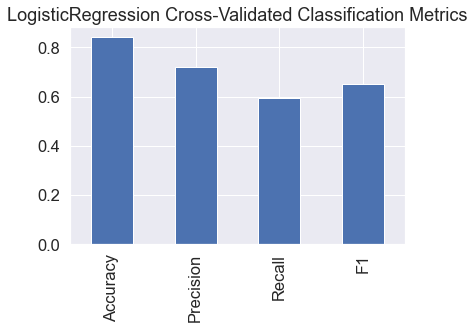

In [389]:
# LogisitcRegression 
log_cv_metrics = pd.DataFrame({"Accuracy":np.mean(log_reg_cv_acc),
                              "Precision":np.mean(log_reg_cv_precision),
                              "Recall":np.mean(log_reg_cv_recall),
                              "F1":np.mean(log_reg_cv_f1) },
                            index=[0])

log_cv_metrics.T.plot.bar(title="LogisticRegression Cross-Validated Classification Metrics",
                         legend=False);

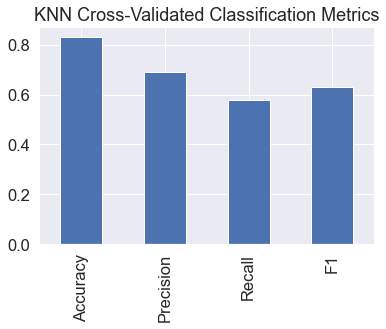

In [391]:
# KNN model
knn_cv_metrics = pd.DataFrame({"Accuracy":np.mean(knn_cv_acc),
                              "Precision":np.mean(knn_cv_precision),
                              "Recall":np.mean(knn_cv_recall),
                              "F1":np.mean(knn_cv_f1) },
                            index=[0])

knn_cv_metrics.T.plot.bar(title="KNN Cross-Validated Classification Metrics",
                         legend=False);

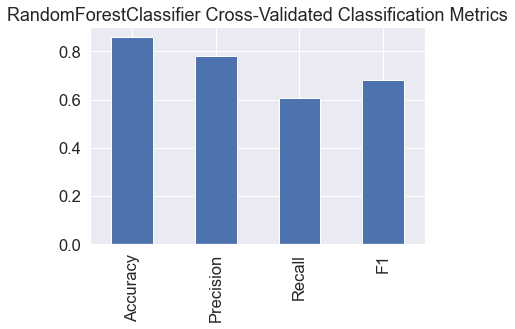

In [392]:
# RandomForsetClassifier model
rf_cv_metrics = pd.DataFrame({"Accuracy":np.mean(rf_cv_acc),
                              "Precision":np.mean(rf_cv_precision),
                              "Recall":np.mean(rf_cv_recall),
                              "F1":np.mean(rf_cv_f1) },
                            index=[0])

rf_cv_metrics.T.plot.bar(title="RandomForestClassifier Cross-Validated Classification Metrics",
                         legend=False);

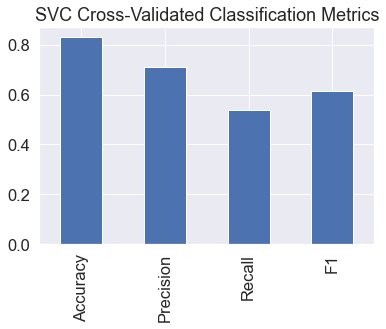

In [393]:
# SVC model 
svc_cv_metrics = pd.DataFrame({"Accuracy":np.mean(svc_cv_acc),
                              "Precision":np.mean(svc_cv_precision),
                              "Recall":np.mean(svc_cv_recall),
                              "F1":np.mean(svc_cv_f1) },
                            index=[0])

svc_cv_metrics.T.plot.bar(title="SVC Cross-Validated Classification Metrics",
                         legend=False);

Context and what you're trying to get out of your project determines what model is the best model to use. 

For this project, I would want a combination of the highest accuracy and f1-score. RandomForestClassifier has both the highest accuracy and f1-score; thus that would be the model I would want to use.

## Feature Importance

Since RandomForestClassifier is the best model. I'll find the feature importance for that model.

In [396]:
# fit the tuned model on the training set 
rf_clf.fit(X_train, y_train);

# check coef_
rf_clf.feature_importances_

array([1.11756369e-01, 5.82286780e-02, 8.79501047e-02, 6.39243791e-02,
       2.79836770e-02, 1.66700736e-01, 9.05642754e-02, 5.03838314e-03,
       3.98026328e-03, 7.99987923e-03, 7.61654421e-03, 7.51482391e-03,
       2.75455781e-03, 3.29348026e-05, 4.64173713e-03, 1.86963047e-06,
       4.91286308e-03, 2.45331078e-02, 5.82163828e-03, 3.92688951e-03,
       3.72840060e-03, 1.15245296e-02, 1.27714291e-04, 1.82711155e-02,
       2.20315063e-03, 5.40800594e-03, 3.89783228e-03, 3.14046633e-03,
       1.27406090e-01, 3.82653797e-02, 3.20136325e-03, 2.60097942e-02,
       1.60081377e-02, 3.21038089e-02, 7.90095862e-04, 1.95018667e-03,
       3.54662317e-03, 3.49183888e-04, 4.16302337e-03, 1.37251368e-04,
       6.26666537e-04, 2.92605781e-04, 7.17970395e-05, 3.43256490e-04,
       6.11873317e-05, 5.72935101e-05, 5.28775246e-05, 4.75435980e-04,
       8.37605054e-05, 4.47129722e-04, 1.33760229e-04, 6.52572815e-05,
       4.67390451e-05, 0.00000000e+00, 1.50220938e-06, 1.32928948e-05,
      

In [400]:
# Match feature importance
feature_dict = dict(zip(df.columns, list(rf_clf.feature_importances_)))
feature_dict

{'age': 0.11175636910735644,
 'workclass': 0.05822867796601294,
 'fnlwgt': 0.08795010472389948,
 'educational-num': 0.06392437905809299,
 'marital-status': 0.027983677003073488,
 'occupation': 0.1667007359666173,
 'relationship': 0.09056427535095044,
 'race': 0.0050383831374918005,
 'hours-per-week': 0.0039802632806470875,
 'native-country': 0.007999879233900957,
 'income': 0.007616544211467287,
 'sex': 0.007514823913168192,
 'Total_capital': 0.0027545578122376256}

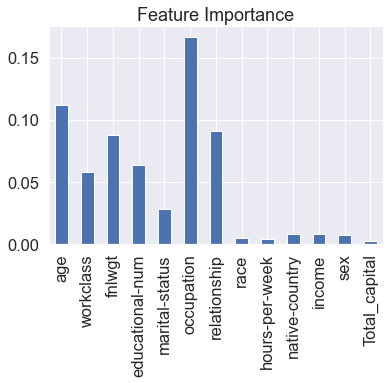

In [401]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [404]:
# crosstab between occupation and income 
pd.crosstab(df["occupation"], df["income"])

income,0,1
occupation,,
Adm-clerical,4779,756
Armed-Forces,10,4
Craft-repair,4656,1354
Exec-managerial,3115,2865
Farming-fishing,1303,172
Handlers-cleaners,1910,135
Machine-op-inspct,2601,364
Other-service,4609,196
Priv-house-serv,227,3


In [407]:
# crosstab between age and income
pd.crosstab(df["age"], df["income"])

income,0,1
age,,
17,492,0
18,694,0
19,855,2
20,914,1
21,925,6
...,...,...
86,1,0
87,1,0
88,4,1


In [408]:
pd.crosstab(df["hours-per-week"], df["income"])

income,0,1
hours-per-week,,
1,10,2
2,21,3
3,33,2
4,42,5
5,52,8
...,...,...
95,1,1
96,8,1
97,1,1
